In [166]:
import pandas as pd
import numpy as np

from collections import defaultdict

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

<h1>IMPORTING DATA FROM CSV</h1>


In [3]:
data = pd.read_csv('output.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5461 entries, 0 to 5460
Data columns (total 16 columns):
Unnamed: 0              5461 non-null int64
LabRefNo                5461 non-null int64
RequestDate             5461 non-null object
Patientcode             5461 non-null int64
PatientName             5461 non-null object
PersonDateOfBirth       2545 non-null object
PatientAge              5461 non-null object
Gender                  5461 non-null object
RenderServiceCode       5461 non-null object
Servicename             5461 non-null object
LabParamCode            5461 non-null object
LabParamName            5461 non-null object
LabParamFinalResult     5461 non-null object
RefRangeLowLimit        4331 non-null float64
RefRangeHighLimit       4331 non-null float64
SampleCollectionDate    5453 non-null object
dtypes: float64(2), int64(3), object(11)
memory usage: 682.7+ KB


In [4]:
data.columns


Index(['Unnamed: 0', 'LabRefNo', 'RequestDate', 'Patientcode', 'PatientName',
       'PersonDateOfBirth', 'PatientAge', 'Gender', 'RenderServiceCode',
       'Servicename', 'LabParamCode', 'LabParamName', 'LabParamFinalResult',
       'RefRangeLowLimit', 'RefRangeHighLimit', 'SampleCollectionDate'],
      dtype='object')

<h1>Checking Distribution of Data</h1>

In [5]:
#Creating set of different Lab test
labParamNames = set(data['LabParamName'])
'''
print('NO of lab tests:', len(labParamNames))
'''

"\nprint('NO of lab tests:', len(labParamNames))\n"

In [6]:
#Counting Number of each test in data
labParamNameCounts = data['LabParamName'].value_counts(dropna=False)
'''
print('Name of Test\t\t\t\tNo of tests')
print(labParamNameCounts)
'''

"\nprint('Name of Test\t\t\t\tNo of tests')\nprint(labParamNameCounts)\n"

In [7]:
#Note:Gender for all entries is Male...
genderCount = data['Gender'].value_counts()
'''
print('Gender\tNo')
print(genderCount)
'''

"\nprint('Gender\tNo')\nprint(genderCount)\n"

In [110]:
#code to check number of positive, negative and undetermined results
check = data[['RefRangeHighLimit','LabParamFinalResult','RefRangeLowLimit']]
inRange, outRange, notnumber = 0, 0, 0
lowLimit, value, highLimit = [], [], []
weird = 0
for i, row in check.iterrows():
    h, v, l = row['RefRangeHighLimit'], row['LabParamFinalResult'], row['RefRangeLowLimit']
    if v.isdigit() or v.replace('.','1').isdigit():
        try:
            h, v, l = float(h), float(v), float(l)
            lowLimit.append(l)
            highLimit.append(h)
            value.append(v)
            if v>=l and v<=h:
                inRange+=1
            else:
                outRange+=1
        except ValueError:
            #what are these tests?
            weird+=1
    else:
        notnumber+=1


In [111]:
#code to check age ranges of patients in data
child, youngAdult, adult, oldAdult = 0, 0 ,0 ,0
for i, v in data['PatientAge'].iteritems():
    age = int(v.split()[0])
    if age in range(19):
        child+=1
    elif age in range(19, 35):
        youngAdult+=1
    elif age in range(35, 61):
        adult+=1
    else:
        oldAdult+=1


In [112]:
#tests per patient
patientset = set(data['PatientName'])
test_per_patient = defaultdict(list)
for name in patientset:
    for k, v in data[data['PatientName']==name].iterrows():
        test_per_patient[name].append(k)
'''
print('Patient\tNo of Tests')
for k, v in test_per_patient.items():
    print(f'{k} {len(v)}')

print('Number of patients:',len(test_per_patient.keys()))
'''

"\nprint('Patient\tNo of Tests')\nfor k, v in test_per_patient.items():\n    print(f'{k} {len(v)}')\n\nprint('Number of patients:',len(test_per_patient.keys()))\n"

<h1>Plotting</h1>

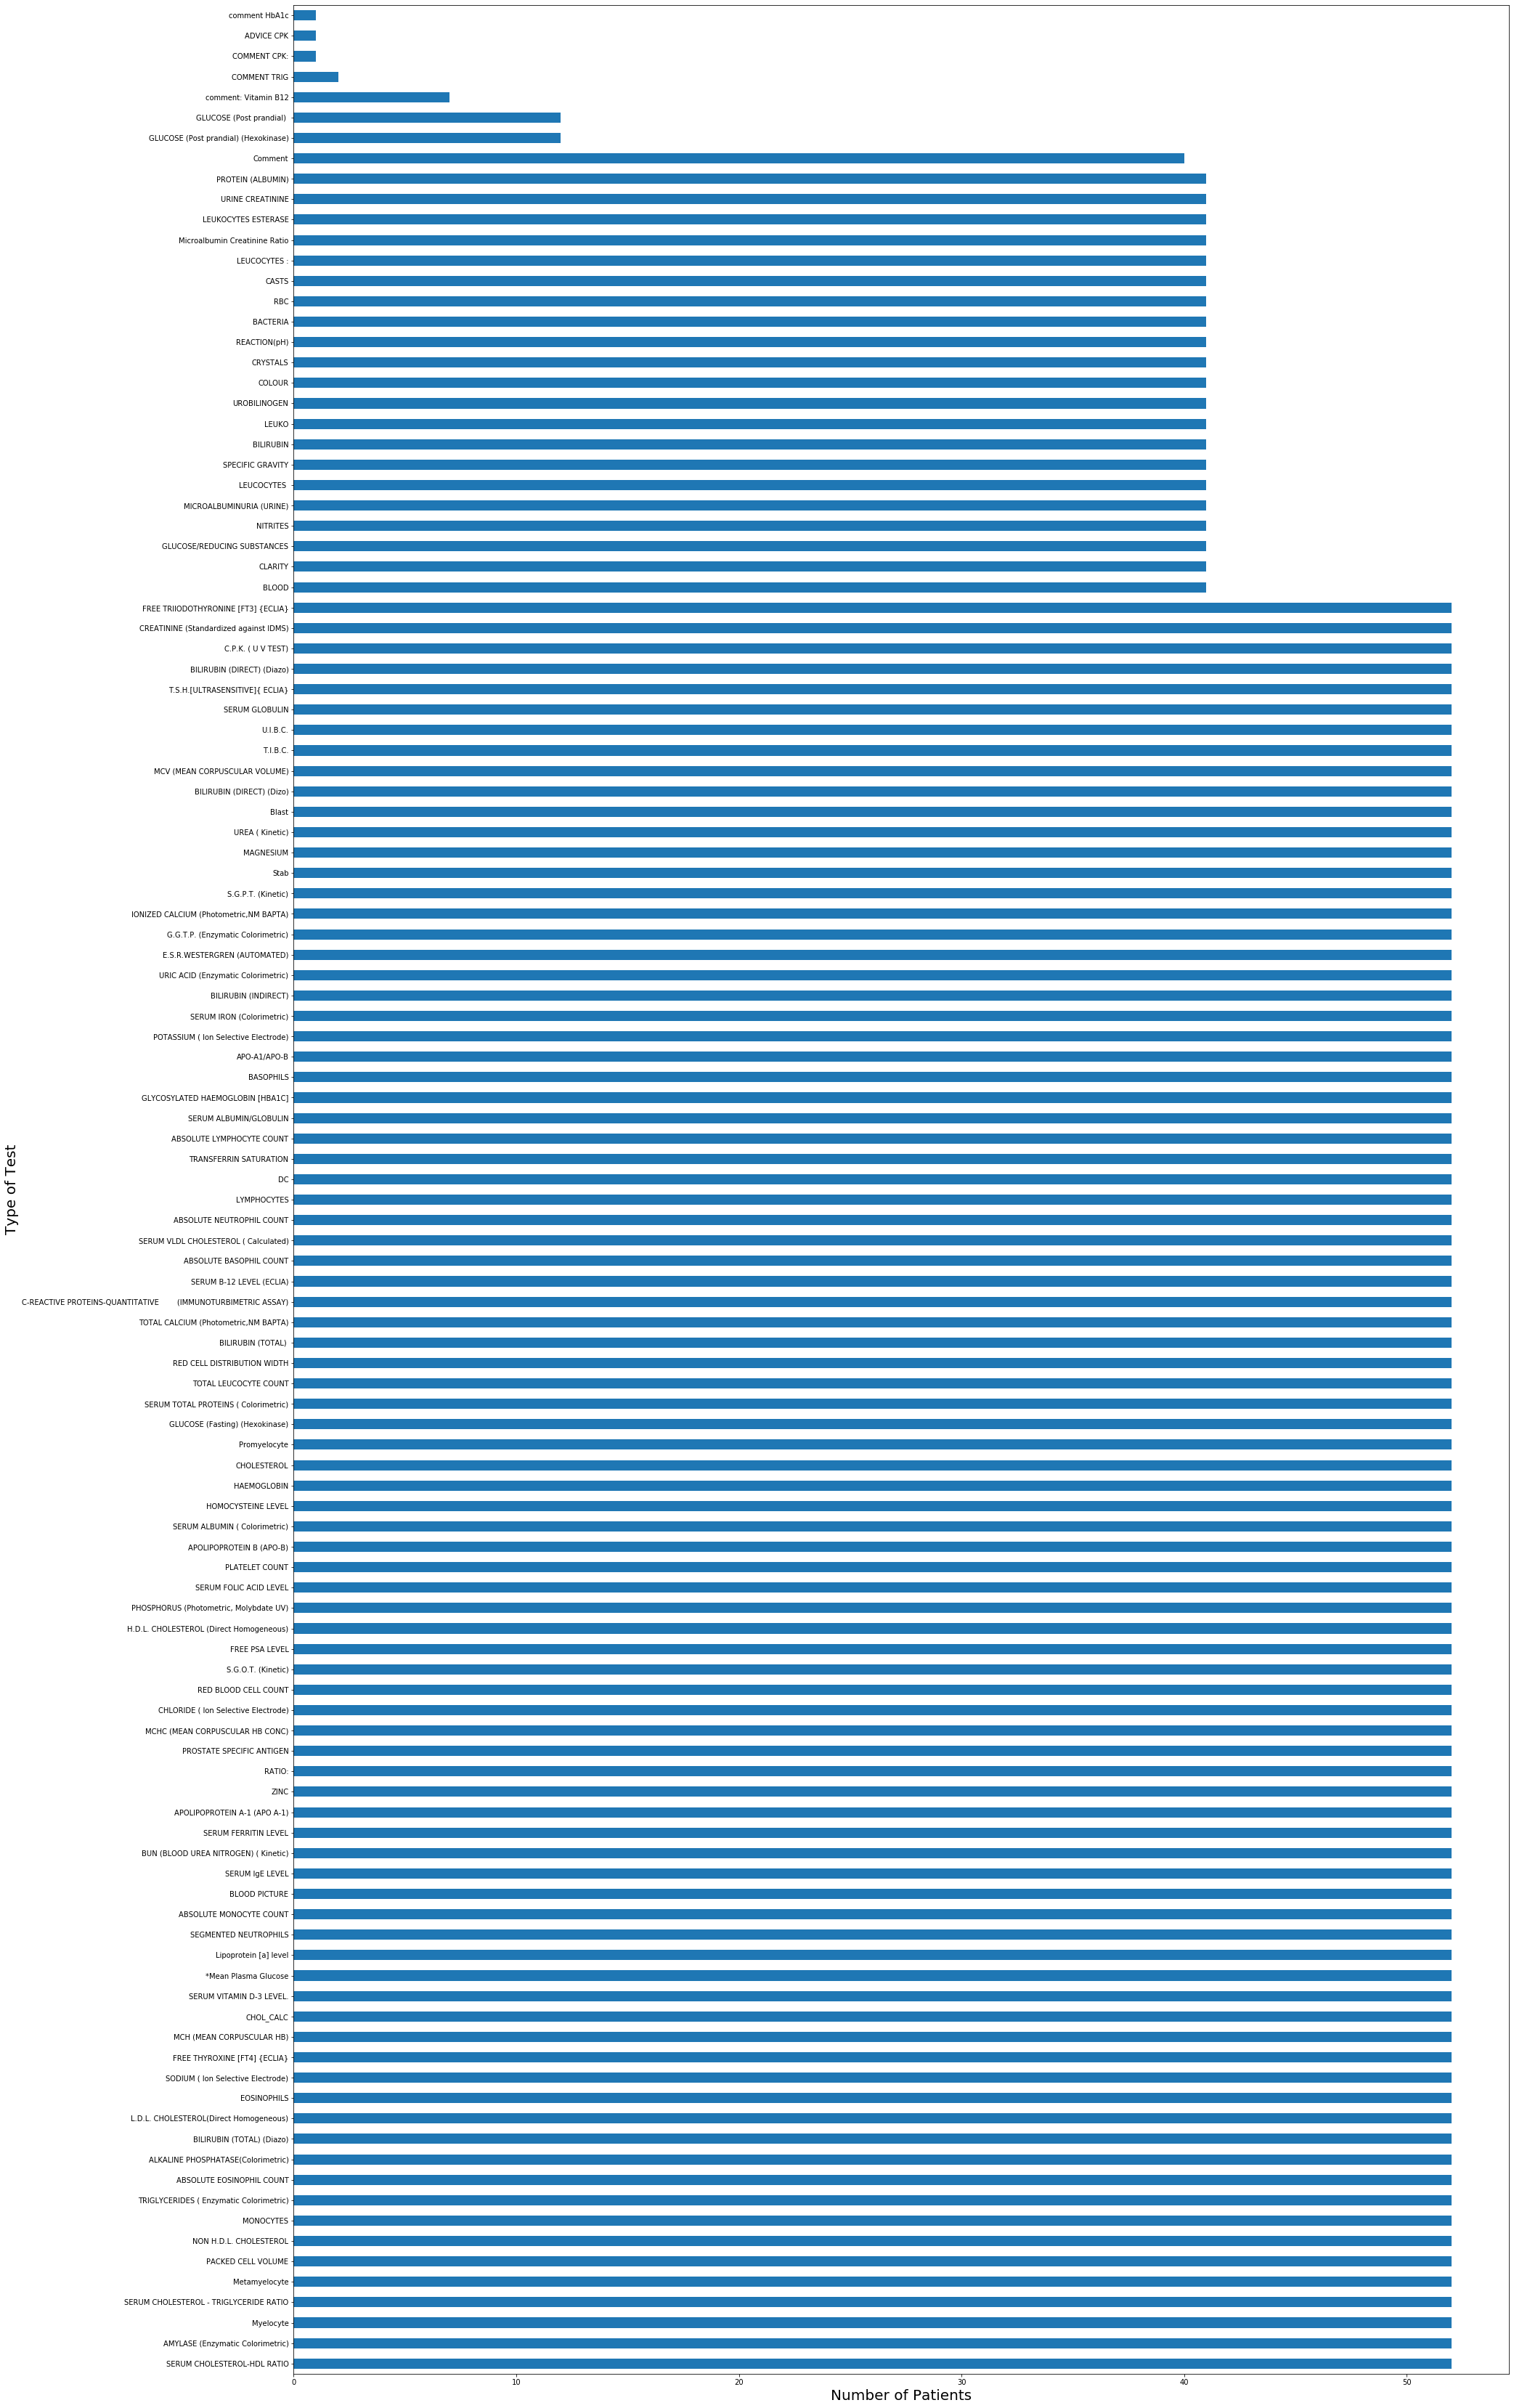

In [165]:
#Plotting values for different types of tests
'''
plt.xlabel('Number of Patients',size=20)
plt.ylabel('Type of Test',size=20)
labParamNameCounts.plot(kind='barh', figsize=(40,40));
'''
plt.xlabel('Number of Patients',size=20)
plt.ylabel('Type of Test',size=20)
data['LabParamName'].value_counts().plot(kind='barh', figsize=(30,60));

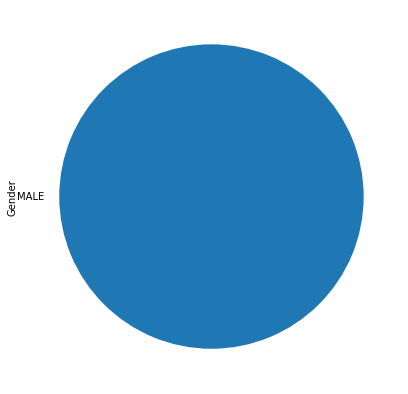

In [158]:
#PATIENT DEMOGRAPHICS
#Plotting gender for tests
'''
plt.tight_layout()
genderCount.plot(kind='pie', figsize=(7,7);
'''
plt.tight_layout()
data.Gender.value_counts().plot(kind='pie',figsize=(7,7));

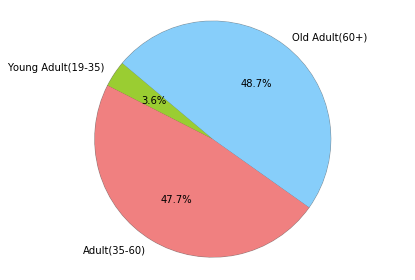

In [157]:

#PATIENT DEMOGRAPHICS
'''
labels = ['Child(0-18)','Young Adult(19-35)','Adult(35-60)','Old Adult(60+)']


sizes = [child, youngAdult, adult, oldAdult]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = [0,0,0,0]

plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%',
 shadow=True, startangle=140)

plt.axis('equal')
plt.show()
'''
#no Child
labels = ['Young Adult(19-35)','Adult(35-60)','Old Adult(60+)']
sizes = [youngAdult, adult, oldAdult]
colors = ['yellowgreen', 'lightcoral', 'lightskyblue']
explode = [0,0,0]

plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%',
 shadow=True, startangle=140,radius=100.5)

plt.axis('equal')
plt.tight_layout()
plt.show()

Average number of tests per patient:  105


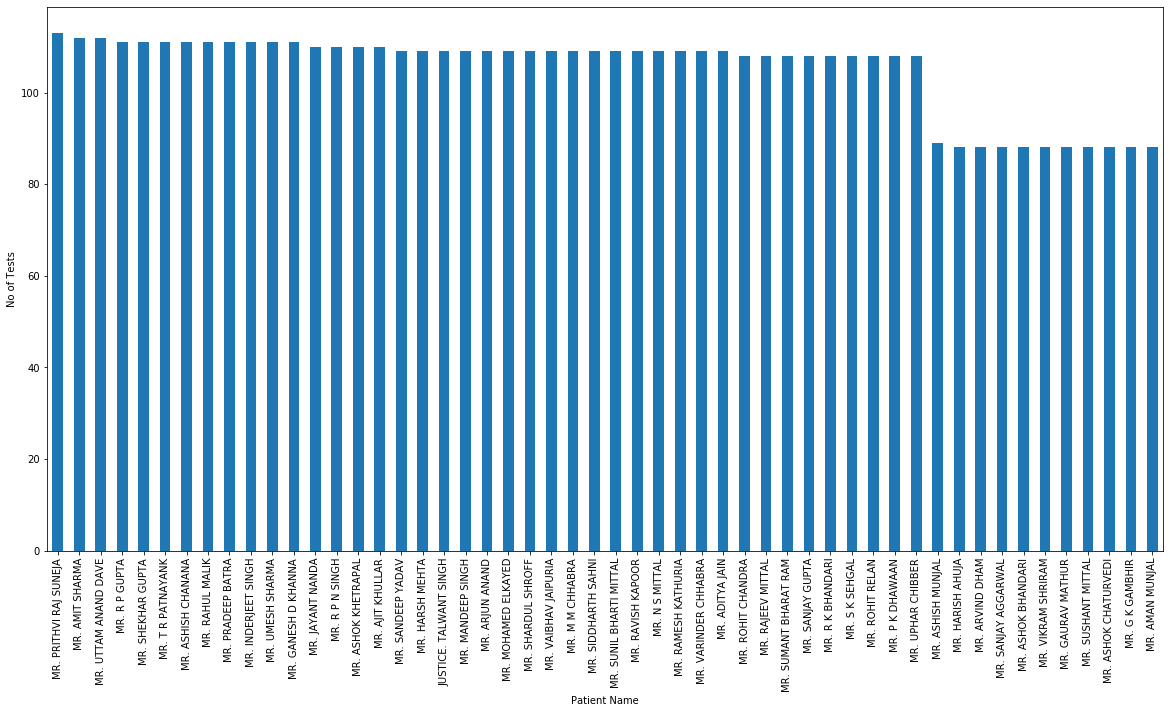

In [153]:
#Patient v/s Number of Tests


plt.xlabel('Patient Name',size=10)
plt.ylabel('No of Tests',size=10)
data['PatientName'].value_counts().plot(kind='bar',figsize=(20, 10));

total = sum(data['PatientName'].value_counts())
noOfPatients= len(list(test_per_patient.keys()))
average = total//noOfPatients
print('Average number of tests per patient: ',average)

In [151]:
#TODO:high,low,value!!